In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# missing data vis 
import missingno


## Plotint setting 
%matplotlib inline
sns.set(style="white",palette= "muted")
sns.set_context("talk", font_scale=0.9)#, rc={"lines.linewidth": 1})


### for ttest 

from scipy.stats import ttest_ind

  *  #### What percentage of users opened the email and what percentage clicked on the link within the email?
  *  #### The VP of marketing thinks that it is stupid to send emails to a random subset and in a random way. Based on all the information you have about the emails that were sent, can you build a model to optimize in future email campaigns to maximize the probability of users clicking on the link inside the email?
  *  ####  By how much do you think your model would improve click through rate ( defined as # of users who click on the link / total users who received the email). How would you test that?
  *  ####  Did you find any interesting pattern on how the email campaign performed for different segments of users? Explain.

In [3]:
email = pd.read_csv("./email_table.csv")
opened = pd.read_csv("./email_opened_table.csv")
linked = pd.read_csv("./link_clicked_table.csv")

In [15]:
opened['open'] = True
linked['link'] = True 

In [18]:
df = email.merge(opened,how = "left",on="email_id")
df = df.merge(linked,how = "left",on="email_id")

## fill nan to False
df['open'] = df['open'].fillna(False)
df['link'] = df['link'].fillna(False)

In [30]:
df.loc[:,['open','link']].sum()/ df['email_id'].count()

open    0.10345
link    0.02119
dtype: float64

In [31]:
df.loc[:,['open','link']].sum()/ df['open'].sum()

open    1.000000
link    0.204833
dtype: float64

## Q1
### so number about 10.3%  will open email 
### and 20.4% of them will click link ( 2.1% of total user recieved email)

In [34]:
df['open_int'] =df['open'].astype(int)
df['link_int'] =df['link'].astype(int)

In [42]:
df.groupby(['email_version']).sum()

,email_id,hour,user_past_purchases,open,link,open_int,link_int
email_version,,,,,,,
generic,25042217388,455042,195039,3984.0,760.0,3984,760
personalized,24826802228,450888,192806,6361.0,1359.0,6361,1359


In [45]:
df[df['open']]#.gruopby(['email_text','email_version']).count()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,open,link,open_int,link_int
1,966622,long_email,personalized,12,Sunday,UK,2,True,True,1,1
6,139620,short_email,personalized,9,Saturday,US,8,True,False,1,0
13,635573,short_email,personalized,3,Thursday,US,8,True,False,1,0
27,117471,long_email,personalized,5,Saturday,US,1,True,False,1,0
43,364825,short_email,personalized,6,Friday,UK,3,True,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99922,191006,short_email,personalized,11,Sunday,US,6,True,False,1,0
99928,683747,short_email,personalized,8,Saturday,US,8,True,True,1,1
99946,893770,short_email,personalized,3,Monday,US,11,True,True,1,1
99950,188943,short_email,generic,9,Tuesday,US,2,True,False,1,0


In [78]:
df[~df['open']] .groupby(['email_text','email_version']).count()['open_int']

email_text   email_version
long_email   generic          23449
             personalized     22243
short_email  generic          22776
             personalized     21187
Name: open_int, dtype: int64

In [99]:
df.groupby(['user_country'],as_index=False)['open_int'].mean()

,user_country,open_int
0,ES,0.039129
1,FR,0.040620
2,UK,0.120167
3,US,0.119020


In [102]:
df .groupby(['email_text','email_version','user_country']).mean()['open_int']

email_text   email_version  user_country
long_email   generic        ES              0.025775
                            FR              0.023126
                            UK              0.087764
                            US              0.080403
             personalized   ES              0.040080
                            FR              0.044657
                            UK              0.130226
                            US              0.128608
short_email  generic        ES              0.032077
                            FR              0.025743
                            UK              0.103118
                            US              0.102745
             personalized   ES              0.058517
                            FR              0.069682
                            UK              0.159831
                            US              0.165363
Name: open_int, dtype: float64

In [ ]:
df.groupby(['email_text','email_version'],as_index=False)['open_int'].mean()

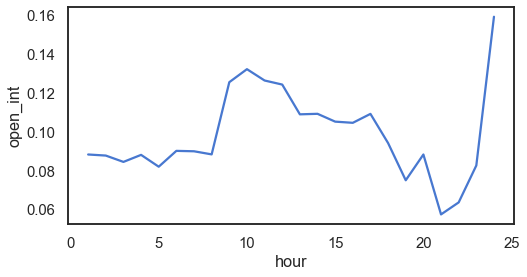

In [89]:
df_temp = df.groupby(['hour'],as_index=False)['open_int'].mean()
plt.figure(figsize=(8,4))
sns.lineplot(x='hour',y = 'open_int',data = df_temp)

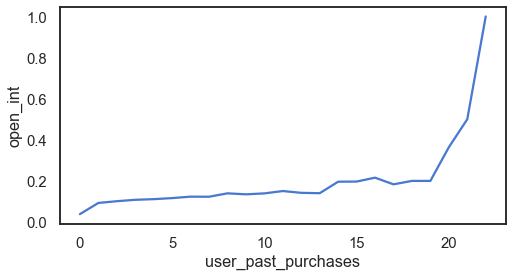

In [96]:
df_temp= df.groupby(['user_past_purchases'],as_index=False)['open_int'].mean()
 
plt.figure(figsize=(8,4))
sns.lineplot(x='user_past_purchases',y = 'open_int',data = df_temp)

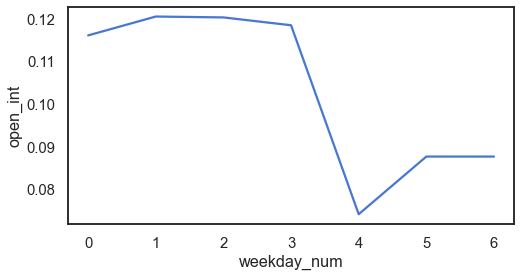

In [93]:
import calendar
d=dict(zip(calendar.day_name,range(7)))
df['weekday_num'] = df['weekday'].apply(lambda x: d[x])
df_temp = df.groupby(['weekday_num'],as_index=False)['open_int'].mean()
plt.figure(figsize=(8,4))
sns.lineplot(x='weekday_num',y = 'open_int',data = df_temp)

###  now let's the link clink rate realated 

In [94]:
df.groupby(['email_text','email_version'],as_index=False)['link_int'].mean()

,email_text,email_version,link_int
0,long_email,generic,0.013711
1,long_email,personalized,0.023403
2,short_email,generic,0.016578
3,short_email,personalized,0.031231


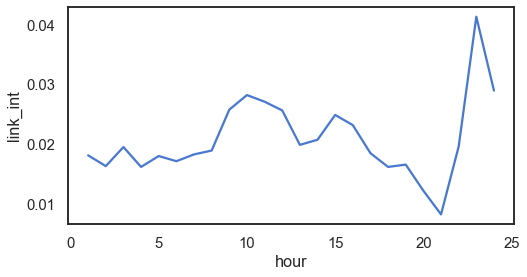

In [103]:
df_temp = df.groupby(['hour'],as_index=False)['link_int'].mean()
plt.figure(figsize=(8,4))
sns.lineplot(x='hour',y = 'link_int',data = df_temp)

In [107]:
df .groupby(['user_country']).mean()['link_int']

user_country
ES    0.008327
FR    0.008004
UK    0.024675
US    0.024360
Name: link_int, dtype: float64

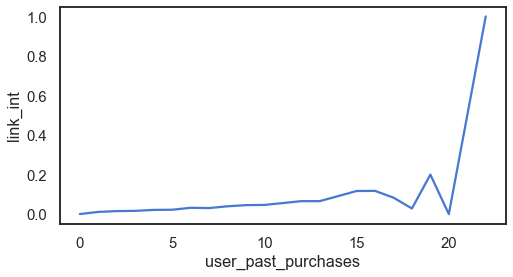

In [108]:
df_temp= df.groupby(['user_past_purchases'],as_index=False)['link_int'].mean()
 
plt.figure(figsize=(8,4))
sns.lineplot(x='user_past_purchases',y = 'link_int',data = df_temp)

In [110]:
df.groupby(['user_past_purchases'],as_index=False)['link_int'].count()

,user_past_purchases,link_int
0,0,13877
1,1,13751
2,2,13036
3,3,12077
4,4,10743
5,5,9042
6,6,7518
7,7,6051
8,8,4393
9,9,3296


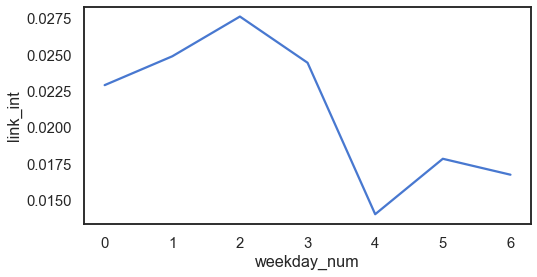

In [111]:
import calendar
d=dict(zip(calendar.day_name,range(7)))
df['weekday_num'] = df['weekday'].apply(lambda x: d[x])
df_temp = df.groupby(['weekday_num'],as_index=False)['link_int'].mean()
plt.figure(figsize=(8,4))
sns.lineplot(x='weekday_num',y = 'link_int',data = df_temp)

In [113]:
open_df = df[df['open']]

C:\Users\jpouu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


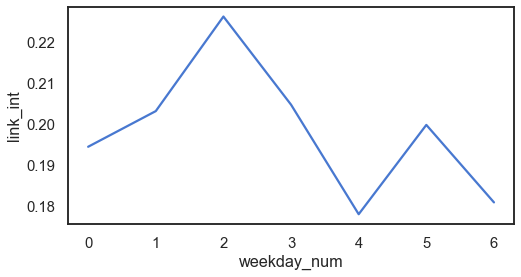

In [116]:
open_df['weekday_num'] = open_df['weekday'].apply(lambda x: d[x])
df_temp = open_df.groupby(['weekday_num'],as_index=False)['link_int'].mean()
plt.figure(figsize=(8,4))
sns.lineplot(x='weekday_num',y = 'link_int',data = df_temp)

In [123]:
df.groupby(['email_text','email_version','user_country']).mean()['link_int'].reset_index().sort_values("link_int")

,email_text,email_version,user_country,link_int
1,long_email,generic,FR,0.004785
8,short_email,generic,ES,0.004812
9,short_email,generic,FR,0.005941
0,long_email,generic,ES,0.006444
5,long_email,personalized,FR,0.007974
4,long_email,personalized,ES,0.010822
12,short_email,personalized,ES,0.011222
13,short_email,personalized,FR,0.013447
3,long_email,generic,US,0.015541
2,long_email,generic,UK,0.016209


In [137]:
open_df.groupby(['email_text','email_version','user_country']).mean()['link_int'].reset_index().sort_values("link_int")

,email_text,email_version,user_country,link_int
8,short_email,generic,ES,0.150000
5,long_email,personalized,FR,0.160714
1,long_email,generic,FR,0.172414
2,long_email,generic,UK,0.173423
11,short_email,generic,US,0.179172
3,long_email,generic,US,0.186732
10,short_email,generic,UK,0.191700
12,short_email,personalized,ES,0.191781
13,short_email,personalized,FR,0.192982
9,short_email,generic,FR,0.200000


In [134]:
## there are 50 row of record show no email open but click the link ?
df.query("open_int == 0 and link_int == 1").shape

(50, 12)

## Q4 

* Users from English-speaking coutries are more likely to click the link 
* Personalized email is more likely to be opened and clicked
* Emails sent at weekends is less likely to be opened and clicked
 